## Limpieza de datos : seleccionando periodos con datos completos



In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os

df = pd.read_csv('data_gdc/gdc_2006_2024_horapunto.csv')

# df.set_index('fhora', inplace=True)
df.info()
# Supongamos que 'df' es tu DataFrame
df = df.drop_duplicates('fhora', keep='first')
df.set_index('fhora', inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158052 entries, 0 to 158051
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fhora           158052 non-null  object 
 1   identificacion  158052 non-null  int64  
 2   ddd             158052 non-null  float64
 3   dddstd          158052 non-null  int64  
 4   dddx            158052 non-null  int64  
 5   hr              158052 non-null  int64  
 6   lluv            114167 non-null  float64
 7   pres            119874 non-null  float64
 8   temp            106922 non-null  float64
 9   ts              104754 non-null  float64
 10  vel             125008 non-null  float64
 11  velx            124626 non-null  float64
 12  qdato           158052 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 15.7+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156578 entries, 2006-01-02 00:00:00+00:00 to 2024-03-23 23:00:00+00:00
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   identificacion  156578 non-null  int64  
 1   ddd             156578 non-null  float64
 2   dddstd          156578 non-null  int64  
 3   dddx            156578 non-null  int64  
 4   hr              156578 non-null  int64  
 5   lluv            113011 non-null  float64
 6   pres            118719 non-null  float64
 7   temp            106147 non-null  float64
 8   ts              103653 non-null  float64
 9   vel             123848 non-null  float64
 10  velx            123466 non-null  float64
 11  qdato           156578 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 15.5+ MB


In [8]:
def periodo_not_null(dataframe: pd.DataFrame, target: str, period: int) -> pd.DataFrame:
    """
    Elimina las filas donde haya `period` o más valores nulos consecutivos.
    
    Parámetros:
    - dataframe: Se espera recibir un DataFrame de pandas con la columna que interesa limpiar.
    - target: Nombre de la columna a limpiar.
    - period: Número entero que indica el máximo periodo de valores nulos consecutivos permitidos.
    
    Retorna:
    - DataFrame sin filas donde haya valores nulos consecutivos que excedan el valor de `period`.
    """
    # Crear una serie booleana donde True indica que el valor es nulo
    is_null = dataframe[target].isnull()
    
    # Calcular las rachas (streaks) de valores nulos consecutivos
    streaks = is_null.groupby((is_null != is_null.shift()).cumsum()).cumsum()
    
    # Crear una máscara para identificar rachas que excedan o igualen el periodo
    mask = (streaks >= period) & is_null
    
    # Eliminar las filas donde las rachas de valores nulos excedan el periodo permitido
    dataframe_clean = dataframe.loc[~mask]
    
    return dataframe_clean

def limpieza_dataframe(dataframe: pd.DataFrame,  period: int = 7*24) -> pd.DataFrame:
    """
    Aplica la limpieza de rachas de nulos a cada columna del DataFrame.
    
    Parámetros:
    - dataframe: El DataFrame original.
    - period: El número máximo de valores nulos consecutivos permitidos.
    
    Retorna:
    - El DataFrame con las columnas limpiadas.
    """
    lista = []

    for target in dataframe.columns:
        if target != 'fhora':
            df_seleccionado = df[[target]]
            df_sin_nulos = periodo_not_null(df_seleccionado, target, period)

            print('Dataframe original: ', df[target].isnull().sum(), '\n', f'Dataframe para la col {target} sin nulos: ', df_sin_nulos[target].isnull().sum())
            print( f'Recuento de valores totales: \n', df_sin_nulos.count(), '\n\n')
            lista.append(df_sin_nulos)
            # df_sin_nulos.to_csv(f'gdc_sin_nulos/{target}_sin_nulos.csv', index='fhora')
    return lista

lista_columnas = limpieza_dataframe(df)

for col in lista_columnas:
    print(col.info())



Dataframe original:  0 
 Dataframe para la col identificacion sin nulos:  0
Recuento de valores totales: 
 identificacion    156578
dtype: int64 


Dataframe original:  0 
 Dataframe para la col ddd sin nulos:  0
Recuento de valores totales: 
 ddd    156578
dtype: int64 


Dataframe original:  0 
 Dataframe para la col dddstd sin nulos:  0
Recuento de valores totales: 
 dddstd    156578
dtype: int64 


Dataframe original:  0 
 Dataframe para la col dddx sin nulos:  0
Recuento de valores totales: 
 dddx    156578
dtype: int64 


Dataframe original:  0 
 Dataframe para la col hr sin nulos:  0
Recuento de valores totales: 
 hr    156578
dtype: int64 


Dataframe original:  43567 
 Dataframe para la col lluv sin nulos:  6381
Recuento de valores totales: 
 lluv    113011
dtype: int64 


Dataframe original:  37859 
 Dataframe para la col pres sin nulos:  7119
Recuento de valores totales: 
 pres    118719
dtype: int64 


Dataframe original:  50431 
 Dataframe para la col temp sin nulos:  5934

In [36]:
# Obtiene una serie booleana donde True indica que la fila está duplicada
duplicados = df.duplicated('fhora', keep=False)

# Usa la serie booleana para filtrar las filas del DataFrame
df_duplicados = df[duplicados]

# Obtiene una lista de los valores duplicados en 'fhora'
lista_duplicados = df_duplicados['fhora'].unique().tolist()

lista_duplicados

['2006-12-02 00:00:00+00:00',
 '2006-12-02 01:00:00+00:00',
 '2006-12-02 02:00:00+00:00',
 '2006-12-02 03:00:00+00:00',
 '2006-12-02 04:00:00+00:00',
 '2006-12-02 05:00:00+00:00',
 '2006-12-02 06:00:00+00:00',
 '2006-12-02 07:00:00+00:00',
 '2006-12-02 08:00:00+00:00',
 '2006-12-02 09:00:00+00:00',
 '2006-12-02 10:00:00+00:00',
 '2006-12-02 11:00:00+00:00',
 '2006-12-02 12:00:00+00:00',
 '2006-12-02 13:00:00+00:00',
 '2006-12-02 14:00:00+00:00',
 '2006-12-02 15:00:00+00:00',
 '2006-12-02 16:00:00+00:00',
 '2006-12-02 17:00:00+00:00',
 '2006-12-02 18:00:00+00:00',
 '2006-12-02 19:00:00+00:00',
 '2006-12-02 20:00:00+00:00',
 '2006-12-02 21:00:00+00:00',
 '2006-12-02 22:00:00+00:00',
 '2006-12-02 23:00:00+00:00',
 '2006-12-03 00:00:00+00:00',
 '2006-12-03 01:00:00+00:00',
 '2006-12-03 02:00:00+00:00',
 '2006-12-03 03:00:00+00:00',
 '2006-12-03 04:00:00+00:00',
 '2006-12-03 05:00:00+00:00',
 '2006-12-03 06:00:00+00:00',
 '2006-12-03 07:00:00+00:00',
 '2006-12-03 08:00:00+00:00',
 '2006-12-

In [10]:
# Supongamos que lista_columnas es una lista de tus DataFrames
df_unido = lista_columnas[0]  

for col in lista_columnas[1:]:  # Iterar sobre los DataFrames restantes
    df_unido = df_unido.merge(col, on='fhora', how='outer')

df_unido.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112081 entries, 2006-01-02 00:00:00+00:00 to 2024-03-23 23:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    106147 non-null  float64
dtypes: float64(1)
memory usage: 1.7+ MB


In [28]:
# Calcular los resultados para df
result_df = pd.DataFrame()
result_df['SumNulls'] = df.isnull().sum()
result_df['PerNull'] = (df.isnull().sum() / len(df) * 100).round(2) 
result_df['TotalAccount'] = df.count()
result_df['DataFrame'] = 'df'  # Añadir una columna para identificar el DataFrame
result_df['Column'] = df.columns  # Añadir una columna para las columnas del DataFrame original

# Calcular los resultados para df_limpio
result_df_limpio = pd.DataFrame()
result_df_limpio['SumNulls'] = df_unido.isnull().sum()
result_df_limpio['PerNull'] = (df_unido.isnull().sum() / len(df) * 100).round(2)
result_df_limpio['TotalAccount'] = df_unido.count()
result_df_limpio['DataFrame'] = 'df_unido'  # Añadir una columna para identificar el DataFrame
result_df_limpio['Column'] = df_unido.columns  # Añadir una columna para las columnas del DataFrame original

# Combinar los resultados en un solo DataFrame
result = pd.concat([result_df, result_df_limpio])

# Crear una tabla pivotante
pivot_table = result.pivot_table(index=['DataFrame', 'Column'], values=['SumNulls', 'PerNull', 'TotalAccount'])
print(pivot_table)

                          PerNull   SumNulls  TotalAccount
DataFrame Column                                          
df        qdato              0.00        0.0      158052.0
df_unido  ddd                0.00        0.0     4270688.0
          dddstd             0.00        0.0     4270688.0
          dddx               0.00        0.0     4270688.0
          hr                 0.00        0.0     4270688.0
          identificacion     0.00        0.0     4270688.0
          lluv             205.29   324465.0     3946223.0
          pres             205.24   324388.0     3946300.0
          qdato              0.00        0.0     4270688.0
          temp             702.11  1109700.0     3160988.0
          ts               281.47   444872.0     3825816.0
          vel              197.63   312352.0     3958336.0
          velx             197.87   312734.0     3957954.0


In [184]:
df_limpio.to_csv('gdc_limpieza_nulos.csv')

### Método manual pero aplicado columna a columna

In [68]:
df_seleccionado = df[['fhora','temp']]
target = 'temp'
period = 7*24

df_sin_nulos = periodo_not_null(df_seleccionado, target, period)

df.isnull().sum()

print('Dataframe original: ', df[target].isnull().sum(), '\n', f'Dataframe para la col {target} sin nulos: ', df_sin_nulos[target].isnull().sum())

print( f'Recuento de valores totales: \n', df_sin_nulos.count())

Dataframe original:  51130 
 Dataframe para la col temp sin nulos:  5936
Recuento de valores totales: 
 fhora    112858
temp     106922
dtype: int64


In [39]:
df_seleccionado = df_seleccionado.set_index('fhora')
df_sin_nulos = df_sin_nulos.set_index('fhora')

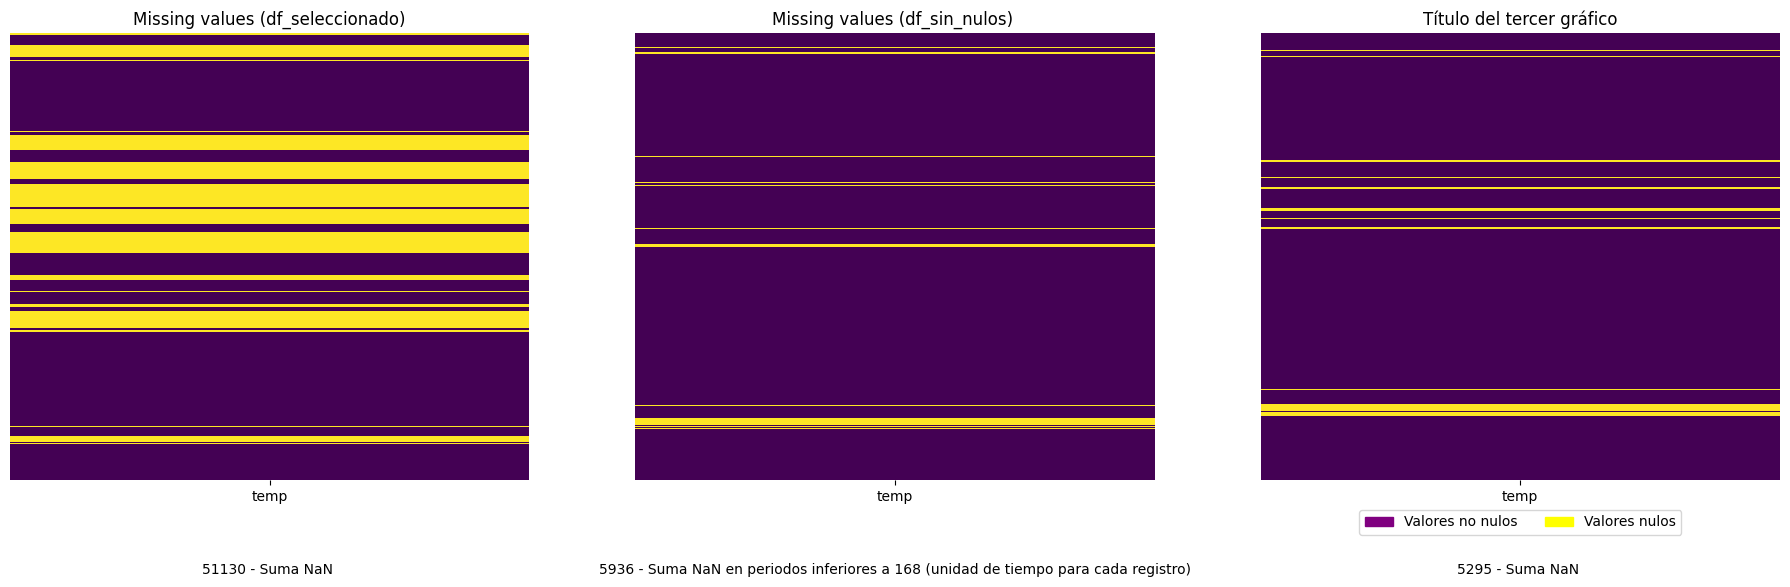

In [182]:
import matplotlib.patches as mpatches
# Crear una figura con tres subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Primer gráfico: df_seleccionado
sns.heatmap(df_seleccionado[['temp']].isnull(), cbar=False, cmap='viridis', yticklabels=False, ax=axes[0])
axes[0].set_title(f'Missing values (df_seleccionado)')
axes[0].text(0.5, -0.2, f'{df_seleccionado["temp"].isnull().sum()} - Suma NaN ', 
             ha='center', va='center', transform=axes[0].transAxes)

# Segundo gráfico: df_sin_nulos
sns.heatmap(df_sin_nulos[['temp']].isnull(), cbar=False, cmap='viridis', yticklabels=False, ax=axes[1])
axes[1].set_title(f'Missing values (df_sin_nulos) ')
axes[1].text(0.5, -0.2, f'{df_sin_nulos["temp"].isnull().sum()} - Suma NaN en periodos inferiores a {period} (unidad de tiempo para cada registro)', 
             ha='center', va='center', transform=axes[1].transAxes)

#Tercer gráfico: Añade aquí el código para el tercer gráfico
sns.heatmap(df_limpio[['temp']].isnull(), cbar=False, cmap='viridis', yticklabels=False, ax=axes[2])
axes[2].set_title('Título del tercer gráfico')
axes[2].text(0.5, -0.2, f'{df_limpio["temp"].isnull().sum()} - Suma NaN ', 
             ha='center', va='center', transform=axes[2].transAxes)

# Añadir la leyenda
null_patch = mpatches.Patch(color='purple', label='Valores no nulos')  # Ajustar el color según el mapa de colores usado
non_null_patch = mpatches.Patch(color='yellow', label='Valores nulos')  # Ajustar el color según el mapa de colores usado
plt.legend(handles=[null_patch, non_null_patch], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Ajustar el espacio entre los gráficos para que no se solapen
plt.tight_layout()

# Mostrar la figura
plt.show()

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional